# 데이터 탐색

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, MinMaxScaler, PowerTransformer, StandardScaler, RobustScaler
from scipy import sparse
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import root_mean_squared_error, mean_squared_error, make_scorer
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectPercentile, SelectFromModel
from sklearn.decomposition import PCA


warnings.filterwarnings("ignore")
import gc

In [3]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='AppleGothic'  #Mac용
#matplotlib.rcParam['font.family']='Malgun Gothic' 윈도우 용
matplotlib.rcParams['font.size']=15 #글자 크기
matplotlib.rcParams['axes.unicode_minus']=False #한글 폰트 사용 시, 마이너스 글자가 깨지는 현상을 해결

In [4]:
df = pd.read_csv("movie_for_feature_engineering.csv")
print(f"{df.shape}")
df

(7064, 17)


,영화제목,감독,제작사,수입사,유통사,영화형태,국적,총스크린수,매출금액,관람객,서울매출금액,서울관람객수,장르,등급,영화구분,개봉연도,개봉월
0,파묘,장재현,"(주)쇼박스,(주)엠씨엠씨",NaN,(주)쇼박스,장편,한국,2355.0,1.057937e+11,10957317.0,2.481515e+10,2507635.0,미스터리,15세이상관람가,일반영화,2024,2
1,듄: 파트2,드니 빌뇌브,NaN,워너브러더스 코리아(주),워너브러더스 코리아(주),장편,미국,1544.0,2.194099e+10,1886010.0,8.730581e+09,687149.0,액션,12세이상관람가,일반영화,2024,2
2,댓글부대,안국진,"(주)영화적순간,주식회사 디믹스스튜디오",NaN,(주)에이스메이커무비웍스,장편,한국,1228.0,5.042399e+09,541058.0,1.309676e+09,134016.0,범죄,15세이상관람가,일반영화,2024,3
3,웡카,폴 킹,NaN,워너브러더스 코리아(주),워너브러더스 코리아(주),장편,미국,1753.0,3.390668e+10,3526213.0,9.818367e+09,980128.0,판타지,전체관람가,일반영화,2024,1
4,고질라 X 콩: 뉴 엠파이어,아담 윈가드,NaN,워너브러더스 코리아(주),워너브러더스 코리아(주),장편,미국,996.0,3.220813e+09,320982.0,7.506203e+08,69172.0,액션,12세이상관람가,일반영화,2024,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7059,D컵여자친구,이정석,스마일컨텐츠,NaN,스마일컨텐츠,장편,한국,1.0,5.000000e+03,1.0,0.000000e+00,0.0,멜로/로맨스,청소년관람불가,일반영화,2020,11
7060,F컵 거유의 육덕녀,버드맨 텟페이,NaN,(주)영진크리에이티브,(주)영진크리에이티브,장편,일본,1.0,6.000000e+03,1.0,0.000000e+00,0.0,멜로/로맨스,청소년관람불가,일반영화,2020,8
7061,F컵 거유의 육덕녀 무삭제판,버드맨 텟페이,NaN,NaN,(주)영진크리에이티브,장편,일본,1.0,6.000000e+03,1.0,0.000000e+00,0.0,멜로/로맨스,청소년관람불가,일반영화,2020,11
7062,G컵 베이글의 격렬한 플레이,NaN,NaN,(주)빅콘미디어,(주)빅콘미디어,장편,일본,1.0,6.000000e+03,1.0,0.000000e+00,0.0,성인물(에로),청소년관람불가,일반영화,2020,3


## 요약본

In [5]:
def resumtable(data):
    summary = pd.DataFrame(data.dtypes).reset_index().rename(columns={"index":"피처", 0:"dtypes"})
    summary["결측치 갯수"] = data.isnull().sum().values
    summary["고윳값 갯수"] = data.nunique().values
    summary["첫번째 값"] = data.iloc[0].values
    summary["두번째 값"] = data.iloc[1].values
    summary["세번째 값"] = data.iloc[2].values
    
    return summary

In [6]:
resumtable(df)

,피처,dtypes,결측치 갯수,고윳값 갯수,첫번째 값,두번째 값,세번째 값
0,영화제목,object,0,7050,파묘,듄: 파트2,댓글부대
1,감독,object,1158,2452,장재현,드니 빌뇌브,안국진
2,제작사,object,4067,763,"(주)쇼박스,(주)엠씨엠씨",NaN,"(주)영화적순간,주식회사 디믹스스튜디오"
3,수입사,object,4933,222,NaN,워너브러더스 코리아(주),NaN
4,유통사,object,0,541,(주)쇼박스,워너브러더스 코리아(주),(주)에이스메이커무비웍스
5,영화형태,object,0,4,장편,장편,장편
6,국적,object,0,56,한국,미국,한국
7,총스크린수,float64,98,595,2355.0,1544.0,1228.0
8,매출금액,float64,3944,1315,105793676208.0,21940993462.0,5042399113.0
9,관람객,float64,268,1613,10957317.0,1886010.0,541058.0


# 결측치 & 전처리
- 결측치를 채우기 위해 전처리를 중간중간 같이 진행해야함


## 감독, 제작사, 수입사 - 결측치
- 결측치가 굉장히 많으므로 전부 etc 처리

In [18227]:
na_cols = ["감독", "제작사", "수입사"]
df[na_cols] = df[na_cols].fillna("etc")

resumtable(df)

,피처,dtypes,결측치 갯수,고윳값 갯수,첫번째 값,두번째 값,세번째 값
0,영화제목,object,0,7050,파묘,듄: 파트2,댓글부대
1,감독,object,0,2453,장재현,드니 빌뇌브,안국진
2,제작사,object,0,764,"(주)쇼박스,(주)엠씨엠씨",etc,"(주)영화적순간,주식회사 디믹스스튜디오"
3,수입사,object,0,223,etc,워너브러더스 코리아(주),etc
4,유통사,object,0,541,(주)쇼박스,워너브러더스 코리아(주),(주)에이스메이커무비웍스
5,영화형태,object,0,4,장편,장편,장편
6,국적,object,0,56,한국,미국,한국
7,총스크린수,float64,98,595,2355.0,1544.0,1228.0
8,매출금액,float64,3944,1315,105793676208.0,21940993462.0,5042399113.0
9,관람객,float64,268,1613,10957317.0,1886010.0,541058.0


## 매출금액 - 결측치
- 관람객 * 1인당_티켓값

### 1인당_티켓값 피처 생성

In [18228]:
df["1인당_티켓값"] = df["매출금액"] / df["관람객"]
df

,영화제목,감독,제작사,수입사,유통사,영화형태,국적,총스크린수,매출금액,관람객,서울매출금액,서울관람객수,장르,등급,영화구분,개봉연도,개봉월,1인당_티켓값
0,파묘,장재현,"(주)쇼박스,(주)엠씨엠씨",etc,(주)쇼박스,장편,한국,2355.0,1.057937e+11,10957317.0,2.481515e+10,2507635.0,미스터리,15세이상관람가,일반영화,2024,2,9655.071238
1,듄: 파트2,드니 빌뇌브,etc,워너브러더스 코리아(주),워너브러더스 코리아(주),장편,미국,1544.0,2.194099e+10,1886010.0,8.730581e+09,687149.0,액션,12세이상관람가,일반영화,2024,2,11633.550968
2,댓글부대,안국진,"(주)영화적순간,주식회사 디믹스스튜디오",etc,(주)에이스메이커무비웍스,장편,한국,1228.0,5.042399e+09,541058.0,1.309676e+09,134016.0,범죄,15세이상관람가,일반영화,2024,3,9319.516786
3,웡카,폴 킹,etc,워너브러더스 코리아(주),워너브러더스 코리아(주),장편,미국,1753.0,3.390668e+10,3526213.0,9.818367e+09,980128.0,판타지,전체관람가,일반영화,2024,1,9615.606207
4,고질라 X 콩: 뉴 엠파이어,아담 윈가드,etc,워너브러더스 코리아(주),워너브러더스 코리아(주),장편,미국,996.0,3.220813e+09,320982.0,7.506203e+08,69172.0,액션,12세이상관람가,일반영화,2024,3,10034.246512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7059,D컵여자친구,이정석,스마일컨텐츠,etc,스마일컨텐츠,장편,한국,1.0,5.000000e+03,1.0,0.000000e+00,0.0,멜로/로맨스,청소년관람불가,일반영화,2020,11,5000.000000
7060,F컵 거유의 육덕녀,버드맨 텟페이,etc,(주)영진크리에이티브,(주)영진크리에이티브,장편,일본,1.0,6.000000e+03,1.0,0.000000e+00,0.0,멜로/로맨스,청소년관람불가,일반영화,2020,8,6000.000000
7061,F컵 거유의 육덕녀 무삭제판,버드맨 텟페이,etc,etc,(주)영진크리에이티브,장편,일본,1.0,6.000000e+03,1.0,0.000000e+00,0.0,멜로/로맨스,청소년관람불가,일반영화,2020,11,6000.000000
7062,G컵 베이글의 격렬한 플레이,etc,etc,(주)빅콘미디어,(주)빅콘미디어,장편,일본,1.0,6.000000e+03,1.0,0.000000e+00,0.0,성인물(에로),청소년관람불가,일반영화,2020,3,6000.000000


In [18229]:
resumtable(df)

,피처,dtypes,결측치 갯수,고윳값 갯수,첫번째 값,두번째 값,세번째 값
0,영화제목,object,0,7050,파묘,듄: 파트2,댓글부대
1,감독,object,0,2453,장재현,드니 빌뇌브,안국진
2,제작사,object,0,764,"(주)쇼박스,(주)엠씨엠씨",etc,"(주)영화적순간,주식회사 디믹스스튜디오"
3,수입사,object,0,223,etc,워너브러더스 코리아(주),etc
4,유통사,object,0,541,(주)쇼박스,워너브러더스 코리아(주),(주)에이스메이커무비웍스
5,영화형태,object,0,4,장편,장편,장편
6,국적,object,0,56,한국,미국,한국
7,총스크린수,float64,98,595,2355.0,1544.0,1228.0
8,매출금액,float64,3944,1315,105793676208.0,21940993462.0,5042399113.0
9,관람객,float64,268,1613,10957317.0,1886010.0,541058.0


### 1인당_티켓값 결측치
- 평균값으로 채우기

In [18230]:
fill_num = df["1인당_티켓값"].mean()
df["1인당_티켓값"] = df["1인당_티켓값"].fillna(fill_num)

del fill_num
gc.collect();
resumtable(df)

,피처,dtypes,결측치 갯수,고윳값 갯수,첫번째 값,두번째 값,세번째 값
0,영화제목,object,0,7050,파묘,듄: 파트2,댓글부대
1,감독,object,0,2453,장재현,드니 빌뇌브,안국진
2,제작사,object,0,764,"(주)쇼박스,(주)엠씨엠씨",etc,"(주)영화적순간,주식회사 디믹스스튜디오"
3,수입사,object,0,223,etc,워너브러더스 코리아(주),etc
4,유통사,object,0,541,(주)쇼박스,워너브러더스 코리아(주),(주)에이스메이커무비웍스
5,영화형태,object,0,4,장편,장편,장편
6,국적,object,0,56,한국,미국,한국
7,총스크린수,float64,98,595,2355.0,1544.0,1228.0
8,매출금액,float64,3944,1315,105793676208.0,21940993462.0,5042399113.0
9,관람객,float64,268,1613,10957317.0,1886010.0,541058.0


- 관람객 * 1인당_티켓값으로 매출금액 결측치 보간

In [18231]:
fill_num = df["1인당_티켓값"].mean()
idx = df.loc[df["매출금액"].isna()].index # 매출금액이 결측치인 행 뽑아내기

df.loc[idx, "매출금액"] = df.loc[idx, "관람객"] * fill_num

In [18232]:
resumtable(df)

,피처,dtypes,결측치 갯수,고윳값 갯수,첫번째 값,두번째 값,세번째 값
0,영화제목,object,0,7050,파묘,듄: 파트2,댓글부대
1,감독,object,0,2453,장재현,드니 빌뇌브,안국진
2,제작사,object,0,764,"(주)쇼박스,(주)엠씨엠씨",etc,"(주)영화적순간,주식회사 디믹스스튜디오"
3,수입사,object,0,223,etc,워너브러더스 코리아(주),etc
4,유통사,object,0,541,(주)쇼박스,워너브러더스 코리아(주),(주)에이스메이커무비웍스
5,영화형태,object,0,4,장편,장편,장편
6,국적,object,0,56,한국,미국,한국
7,총스크린수,float64,98,595,2355.0,1544.0,1228.0
8,매출금액,float64,268,1970,105793676208.0,21940993462.0,5042399113.0
9,관람객,float64,268,1613,10957317.0,1886010.0,541058.0


### 매출금액을 연도, 장르, 등급, 국적을 묶어서 평균치로 결측치 보간

#### 등급 전처리

In [18233]:
df["등급"].value_counts() # 12,15세 관람가 합치기

등급
청소년관람불가            4388
15세이상관람가           1180
12세이상관람가            892
전체관람가               598
15세관람가                3
12세관람가                2
연소자관람불가,청소년관람불가       1
Name: count, dtype: int64

In [18234]:
df.loc[df["등급"].str.contains("15세관람가"), "등급"] = "15세이상관람가"
df.loc[df["등급"].str.contains("12세관람가"), "등급"] = "12세이상관람가"
df.loc[df["등급"].str.contains("연소자"), "등급"] = "청소년관람불가"

df["등급"].value_counts()

등급
청소년관람불가     4389
15세이상관람가    1183
12세이상관람가     894
전체관람가        598
Name: count, dtype: int64

#### 장르 전처리

- 결측치는 전부 기타(장르가 없는 영화는 없음)

In [18235]:
df.loc[97, "장르"] = "판타지" # 외계+인 2부
df.loc[113, "장르"] = "공포(호러)" # 부르달락: 흡혈귀
df.loc[261, "장르"] = "드라마" # 비밀의 언덕
df.loc[287, "장르"] = "드라마" # 바비
df.loc[424, "장르"] = "멜로/로맨스" # 99번의 정사
df.loc[507, "장르"] = "드라마" # 메타모르포제의 툇마루
df.loc[508, "장르"] = "드라마" # 신입사원: 더 무비
df.loc[647, "장르"] = "드라마" # 살롱 드 서울
df.loc[656, "장르"] = "코미디" # 북 클럽: 넥스트 챕터
df.loc[658, "장르"] = "드라마" # 스프린터
df.loc[665, "장르"] = "드라마" # 차선변경-큐폴라를 올려다보며-
df.loc[1101, "장르"] = "드라마" # 컨버세이션
df.loc[1177, "장르"] = "코미디" # 스위치
df.loc[1319, "장르"] = "애니메이션" # 뿌까의 짜장면파티
df.loc[1707, "장르"] = "애니메이션" # 4DX 문유
df.loc[1861, "장르"] = "멜로/로맨스" # 썸머 필름을 타고!
df.loc[1986, "장르"] = "드라마" # 초록밤
df.loc[2066, "장르"] = "드라마" # 아이를 위한 아이
df.loc[2387, "장르"] = "스릴러" # 센티그레이드
df.loc[2399, "장르"] = "스릴러" # 셧 인
df.loc[2736, "장르"] = "액션" # 하빗
df.loc[2844, "장르"] = "미스터리" # 시크릿 카운터
df.loc[2911, "장르"] = "드라마" # 끝없음에 관하여
df.loc[3052, "장르"] = "액션" # 데드락: 라스트리벤지
df.loc[3238, "장르"] = "액션" # 무림철검
df.loc[3545, "장르"] = "액션" # 도신-지존천하
df.loc[3561, "장르"] = "드라마" # 인트로덕션
df.loc[3684, "장르"] = "액션" # 천녀유혼: 귀애도
df.loc[3811, "장르"] = "멜로/로맨스" # 수필러브
df.loc[3871, "장르"] = "드라마" # 식물카페, 온정
df.loc[3966, "장르"] = "드라마" # 어댑테이션
df.loc[4203, "장르"] = "멜로/로맨스" # 네가 내가 되었으면 좋겠다
df.loc[4487, "장르"] = "드라마" # 잃어버린 아이들
df.loc[4506, "장르"] = "드라마" # 나의 먼 가족
df.loc[4688, "장르"] = "스릴러" # 구라, 베토벤
df.loc[5047, "장르"] = "드라마" # 마지막 휴가
df.loc[5521, "장르"] = "드라마" # 아웃사이더
df.loc[5572, "장르"] = "멜로/로맨스" # 마음에 부는 바람
df.loc[5771, "장르"] = "멜로/로맨스" # 러브라인
df.loc[5775, "장르"] = "드라마" # 잊지 않았어요
df.loc[5781, "장르"] = "드라마" # 우리 안의 그들
df.loc[5936, "장르"] = "코미디" # 디재스터 라이프
df.loc[6078, "장르"] = "판타지" # 보존상: 천년의 유혼
df.loc[6691, "장르"] = "코미디" # 연애 완전 정복
df.loc[6731, "장르"] = "액션" # 왕대륙의 기묘기사
df.loc[df["장르"] == "기타", "장르"] = "성인물(에로)"

In [18236]:
resumtable(df)

,피처,dtypes,결측치 갯수,고윳값 갯수,첫번째 값,두번째 값,세번째 값
0,영화제목,object,0,7050,파묘,듄: 파트2,댓글부대
1,감독,object,0,2453,장재현,드니 빌뇌브,안국진
2,제작사,object,0,764,"(주)쇼박스,(주)엠씨엠씨",etc,"(주)영화적순간,주식회사 디믹스스튜디오"
3,수입사,object,0,223,etc,워너브러더스 코리아(주),etc
4,유통사,object,0,541,(주)쇼박스,워너브러더스 코리아(주),(주)에이스메이커무비웍스
5,영화형태,object,0,4,장편,장편,장편
6,국적,object,0,56,한국,미국,한국
7,총스크린수,float64,98,595,2355.0,1544.0,1228.0
8,매출금액,float64,268,1970,105793676208.0,21940993462.0,5042399113.0
9,관람객,float64,268,1613,10957317.0,1886010.0,541058.0


##### 장르 오류 바로잡기
- 성인물인데 멜로/로맨스로 구분되어 있음
    - 멜로/로맨스이면서 총스크린수가 굉장히 적은 경우
    - 1733개의 성인물중 총스크린수가 5이하의 데이터가 1712개이다

In [18237]:
# 장르가 멜로/로맨스 & 총스크린수가 5이하 & 국적이 한국or 일본 > 전부 에로물
df.loc[(df["장르"] == "멜로/로맨스") & (df["총스크린수"] <= 5) & (df["국적"].isin(["한국", "일본"])), "장르"] = "성인물(에로)"

#### 국적 전처리
- 기타는 2개국 이상 or 결측치
- 라트비아, 푸에르토리코, 파라과이, 그리스 < 원본데이터 국적에 없길래, 기타로 그대로 유지

In [18238]:
df.loc[df["국적"] == "기타"].shape

(81, 18)

In [18239]:
df.loc[319, "국적"] = "태국" # 유앤미앤미
df.loc[326, "국적"] = "영국" # 팟 제너레이션
df.loc[424, "국적"] = "스위스" # 99번의 정사
df.loc[930, "국적"] = "체코" # 초대의 법칙
df.loc[1066, "국적"] = "태국" # 천개의 별 이야기 더 시리즈
df.loc[1971, "국적"] = "벨기에" # K클래식 제너레이션
df.loc[2239, "국적"] = "덴마크" # 어나더 라운드
df.loc[2454, "국적"] = "이스라엘" # 그리스도 디 오리진
df.loc[2589, "국적"] = "미국" # 나의 집은 어디인가
df.loc[3358, "국적"] = "멕시코" # 뉴 오더
df.loc[3359, "국적"] = "뉴질랜드" # 리유니언
df.loc[3487, "국적"] = "대만" # 침묵의 숲
df.loc[3665, "국적"] = "오스트리아" # 마를린
df.loc[3681, "국적"] = "대만" # 상견니 대만판 13화
df.loc[3818, "국적"] = "인도" # 잘리카투
df.loc[3931, "국적"] = "터키" # 대테러부대: 팀울프
df.loc[3977, "국적"] = "남아프리카공화국" # 정사: 서로 다른 욕망
df.loc[4098, "국적"] = "아일랜드" # 데이팅 앰버
df.loc[4107, "국적"] = "스웨덴" # 비커밍 아스트리드
df.loc[4171, "국적"] = "이스라엘" # 저주받은 자들
df.loc[4180, "국적"] = "덴마크" # 라이더스 오브 저스티스
df.loc[4234, "국적"] = "영국" # 레저렉션 이펙트
df.loc[4377, "국적"] = "대만" # 해길랍
df.loc[4400, "국적"] = "핀란드" # 바이올린 플레이어
df.loc[4485, "국적"] = "스웨덴" # 디 아더 사이드
df.loc[4490, "국적"] = "러시아" # 아이카
df.loc[4505, "국적"] = "모로코" # IS탈출
df.loc[4511, "국적"] = "노르웨이" # 라라의 신비한 모험
df.loc[4552, "국적"] = "덴마크" # 드림빌더
df.loc[4566, "국적"] = "핀란드" # 헬렌: 내 영혼의 자화상
df.loc[4673, "국적"] = "벨기에" # 더 레이서
df.loc[4691, "국적"] = "노르웨이" # 더 터널
df.loc[4900, "국적"] = "대만" # 마이 미씽 발렌타인
df.loc[4910, "국적"] = "스웨덴" # 438일
df.loc[4941, "국적"] = "미국" # 데스 오브 미
df.loc[4947, "국적"] = "에스토니아" # 나의 작은 동무
df.loc[4960, "국적"] = "프랑스" # 썸머85
df.loc[5086, "국적"] = "대만" # 공포분자
df.loc[5243, "국적"] = "대만" # 반교: 디텐션
df.loc[5337, "국적"] = "스웨덴" # 딥워터
df.loc[5349, "국적"] = "대만" # 신과 나: 100일간의 거래
df.loc[5429, "국적"] = "뉴질랜드" # 송 오브 러브
df.loc[6085, "국적"] = "터키" # 터키쉬 아이스크림
df.loc[6723, "국적"] = "노르웨이" # 올머스트다이

In [18240]:
resumtable(df)

,피처,dtypes,결측치 갯수,고윳값 갯수,첫번째 값,두번째 값,세번째 값
0,영화제목,object,0,7050,파묘,듄: 파트2,댓글부대
1,감독,object,0,2453,장재현,드니 빌뇌브,안국진
2,제작사,object,0,764,"(주)쇼박스,(주)엠씨엠씨",etc,"(주)영화적순간,주식회사 디믹스스튜디오"
3,수입사,object,0,223,etc,워너브러더스 코리아(주),etc
4,유통사,object,0,541,(주)쇼박스,워너브러더스 코리아(주),(주)에이스메이커무비웍스
5,영화형태,object,0,4,장편,장편,장편
6,국적,object,0,56,한국,미국,한국
7,총스크린수,float64,98,595,2355.0,1544.0,1228.0
8,매출금액,float64,268,1970,105793676208.0,21940993462.0,5042399113.0
9,관람객,float64,268,1613,10957317.0,1886010.0,541058.0


- 나라별 데이터 5 미만 > 국적 "기타"로 변환

In [18241]:
mask = df["국적"].value_counts() < 5
country = df["국적"].value_counts()[mask].index

df.loc[df["국적"].isin(country), "국적"] = "기타"

del mask, country
gc.collect();

- 2개국 이상 제작 > 국적 "multy"로 변환

In [18242]:
df.loc[173, "국적"] = "multy"
df.loc[205, "국적"] = "multy"
df.loc[281, "국적"] = "multy"
df.loc[302, "국적"] = "multy"
df.loc[306, "국적"] = "multy"
df.loc[427, "국적"] = "multy"
df.loc[1186, "국적"] = "multy"
df.loc[2287, "국적"] = "multy"
df.loc[2552, "국적"] = "multy"
df.loc[2911, "국적"] = "multy"
df.loc[3075, "국적"] = "multy"
df.loc[3078, "국적"] = "multy"
df.loc[3104, "국적"] = "multy"
df.loc[3185, "국적"] = "multy"
df.loc[3371, "국적"] = "multy"
df.loc[3501, "국적"] = "multy"
df.loc[3546, "국적"] = "multy"
df.loc[3555, "국적"] = "multy"
df.loc[4047, "국적"] = "multy"
df.loc[4068, "국적"] = "multy"
df.loc[4121, "국적"] = "multy"
df.loc[4195, "국적"] = "multy"
df.loc[4487, "국적"] = "multy"
df.loc[4772, "국적"] = "multy"
df.loc[4894, "국적"] = "multy"
df.loc[4948, "국적"] = "multy"
df.loc[5355, "국적"] = "multy"
df.loc[5366, "국적"] = "multy"
df.loc[5384, "국적"] = "multy"
df.loc[5571, "국적"] = "multy"

In [18243]:
resumtable(df)

,피처,dtypes,결측치 갯수,고윳값 갯수,첫번째 값,두번째 값,세번째 값
0,영화제목,object,0,7050,파묘,듄: 파트2,댓글부대
1,감독,object,0,2453,장재현,드니 빌뇌브,안국진
2,제작사,object,0,764,"(주)쇼박스,(주)엠씨엠씨",etc,"(주)영화적순간,주식회사 디믹스스튜디오"
3,수입사,object,0,223,etc,워너브러더스 코리아(주),etc
4,유통사,object,0,541,(주)쇼박스,워너브러더스 코리아(주),(주)에이스메이커무비웍스
5,영화형태,object,0,4,장편,장편,장편
6,국적,object,0,29,한국,미국,한국
7,총스크린수,float64,98,595,2355.0,1544.0,1228.0
8,매출금액,float64,268,1970,105793676208.0,21940993462.0,5042399113.0
9,관람객,float64,268,1613,10957317.0,1886010.0,541058.0


#### 영화형태, 연도, 장르, 등급, 국적 별 평균 매출 구하여 매출금액 결측치 보간


In [18244]:
if df["매출금액"].isna().any() == True: # 매출금액에 결측치가 있다면
    # ["개봉연도", "영화형태", "국적" ,"장르", "등급"] 별 매출금액 평균을 구하여 매출금액 결측치 보간
    tmp = df.groupby(["개봉연도", "영화형태", "국적" ,"장르", "등급"])["매출금액"].mean().reset_index().rename(columns={"매출금액":"평균매출금액"})
    df = df.merge(tmp, how="left", on=["개봉연도", "영화형태", "국적", "장르", "등급"])
        
    df.loc[df["매출금액"].isna(), "매출금액"] = df.loc[df["매출금액"].isna(), "평균매출금액"]
    df = df.drop(columns = "평균매출금액") # 필요없는 피처 삭제

    if df["매출금액"].isna().any() == True: # 그래도 매출금액에 결측치가 있다면
        # 장르, 영화형태 제외하고 다시 평균매출 구하기 (좀더 러프하게)
        tmp = df.groupby(["개봉연도", "국적" , "등급"])["매출금액"].mean().reset_index().rename(columns={"매출금액":"평균매출금액"})
        df = df.merge(tmp, how="left", on=["개봉연도", "국적", "등급"])
        
        df.loc[df["매출금액"].isna(), "매출금액"] = df.loc[df["매출금액"].isna(), "평균매출금액"]
        df = df.drop(columns = "평균매출금액") # 필요없는 피처 삭제

resumtable(df) # 15개의 결측치는 직접 서칭후 관객수 * 평균 1인당_티켓값

,피처,dtypes,결측치 갯수,고윳값 갯수,첫번째 값,두번째 값,세번째 값
0,영화제목,object,0,7050,파묘,듄: 파트2,댓글부대
1,감독,object,0,2453,장재현,드니 빌뇌브,안국진
2,제작사,object,0,764,"(주)쇼박스,(주)엠씨엠씨",etc,"(주)영화적순간,주식회사 디믹스스튜디오"
3,수입사,object,0,223,etc,워너브러더스 코리아(주),etc
4,유통사,object,0,541,(주)쇼박스,워너브러더스 코리아(주),(주)에이스메이커무비웍스
5,영화형태,object,0,4,장편,장편,장편
6,국적,object,0,29,한국,미국,한국
7,총스크린수,float64,98,595,2355.0,1544.0,1228.0
8,매출금액,float64,15,2092,105793676208.0,21940993462.0,5042399113.0
9,관람객,float64,268,1613,10957317.0,1886010.0,541058.0


In [18245]:
df.loc[df["매출금액"].isna()]

,영화제목,감독,제작사,수입사,유통사,영화형태,국적,총스크린수,매출금액,관람객,서울매출금액,서울관람객수,장르,등급,영화구분,개봉연도,개봉월,1인당_티켓값
319,유앤미앤미,"위완 홍비바타나,위우완 홍비바타나",etc,etc,주식회사 원더스튜디오,장편,태국,73.0,NaN,NaN,NaN,NaN,멜로/로맨스,전체관람가,독립/예술영화,2023,10,6350.528136
321,"람빅, 시간과 열정의 맥주",다니엘 루이즈,etc,(주)마노엔터테인먼트,(주)마노엔터테인먼트,장편,스페인,26.0,NaN,NaN,NaN,NaN,다큐멘터리,전체관람가,독립/예술영화,2023,10,6350.528136
327,세이 예스 어게인,etc,etc,초코필름,(주)팝엔터테인먼트,장편,대만,65.0,NaN,NaN,NaN,583.0,멜로/로맨스,12세이상관람가,일반영화,2023,10,6350.528136
383,볼코노고프 대위 탈출하다,"나타샤 메르쿨로바,알렉세이 추포프",etc,주식회사 슈아픽처스,주식회사 슈아픽처스,장편,러시아,36.0,NaN,NaN,NaN,NaN,스릴러,15세이상관람가,독립/예술영화,2023,8,6350.528136
502,슈퍼 키드 헤일리,라스무스 A. 실버르센,etc,찬란,(주)팝엔터테인먼트,장편,노르웨이,176.0,NaN,NaN,NaN,267.0,애니메이션,전체관람가,독립/예술영화,2023,7,6350.528136
629,플래닛,드미트리 키셀레브,etc,(주)올스타엔터테인먼트,(주)올스타엔터테인먼트,장편,러시아,135.0,NaN,NaN,NaN,NaN,SF,12세이상관람가,독립/예술영화,2023,7,6350.528136
759,메리 마이 데드 바디,청웨이하오,etc,(주)리안컨텐츠,"주식회사 원더스튜디오,(주)리안컨텐츠",장편,대만,103.0,NaN,NaN,NaN,NaN,코미디,12세이상관람가,일반영화,2023,5,6350.528136
919,치킨래빗: 잃어버린 보물을 찾아서,벤 스타센,etc,(주)퍼스트런,(주)스튜디오디에이치엘,장편,벨기에,234.0,NaN,NaN,NaN,485.0,애니메이션,전체관람가,독립/예술영화,2023,3,6350.528136
1166,리틀 엘렌: 외계인과 안테나 대소동,etc,etc,주식회사 블루필름웍스,주식회사 블루필름웍스,장편,덴마크,140.0,NaN,NaN,NaN,500.0,애니메이션,전체관람가,독립/예술영화,2023,3,6350.528136
1553,에브리띵 윌 체인지,etc,etc,(주)영화사 안다미로,(주)영화사 안다미로,장편,독일,15.0,NaN,NaN,NaN,1011.0,SF,12세이상관람가,독립/예술영화,2022,11,6350.528136


In [18246]:
ticket_price = 6350.5

df.loc[319, "매출금액"] = 4054 * ticket_price
df.loc[321, "매출금액"] = 2856 * ticket_price
df.loc[327, "매출금액"] = 1118 * ticket_price
df.loc[383, "매출금액"] = 5167 * ticket_price
df.loc[502, "매출금액"] = 23000 * ticket_price
df.loc[629, "매출금액"] = 7626 * ticket_price
df.loc[759, "매출금액"] = 30000 * ticket_price
df.loc[919, "매출금액"] = 65000 * ticket_price
df.loc[1166, "매출금액"] = 3275 * ticket_price
df.loc[1553, "매출금액"] = 2723 * ticket_price
df.loc[2374, "매출금액"] = 11000 * ticket_price
df.loc[2552, "매출금액"] = 17000 * ticket_price
df.loc[3904, "매출금액"] = 3114 * ticket_price
df.loc[3904, "매출금액"] = 3114 * ticket_price
df.loc[3906, "매출금액"] = 1665 * ticket_price
df.loc[4180, "매출금액"] = 7131 * ticket_price

resumtable(df)

,피처,dtypes,결측치 갯수,고윳값 갯수,첫번째 값,두번째 값,세번째 값
0,영화제목,object,0,7050,파묘,듄: 파트2,댓글부대
1,감독,object,0,2453,장재현,드니 빌뇌브,안국진
2,제작사,object,0,764,"(주)쇼박스,(주)엠씨엠씨",etc,"(주)영화적순간,주식회사 디믹스스튜디오"
3,수입사,object,0,223,etc,워너브러더스 코리아(주),etc
4,유통사,object,0,541,(주)쇼박스,워너브러더스 코리아(주),(주)에이스메이커무비웍스
5,영화형태,object,0,4,장편,장편,장편
6,국적,object,0,29,한국,미국,한국
7,총스크린수,float64,98,595,2355.0,1544.0,1228.0
8,매출금액,float64,0,2107,105793676208.0,21940993462.0,5042399113.0
9,관람객,float64,268,1613,10957317.0,1886010.0,541058.0


## 관람객 - 결측치

In [18247]:
if df["관람객"].isna().any() == True: # 관람객에 결측치가 있다면
    # ["개봉연도", "영화형태", "국적" ,"장르", "등급"] 별 관람객 평균을 구하여 관람객 결측치 보간
    tmp = df.groupby(["개봉연도", "영화형태", "국적" ,"장르", "등급"])["관람객"].mean().reset_index().rename(columns={"관람객":"평균관람객수"})
    df = df.merge(tmp, how="left", on=["개봉연도", "영화형태", "국적", "장르", "등급"])
        
    df.loc[df["관람객"].isna(), "관람객"] = df.loc[df["관람객"].isna(), "평균관람객수"]
    df = df.drop(columns = "평균관람객수") # 필요없는 피처 삭제

    if df["관람객"].isna().any() == True: # 그래도 관람객에 결측치가 있다면
        # 장르, 영화형태 제외하고 다시 평균매출 구하기 (좀더 러프하게)
        tmp = df.groupby(["개봉연도", "국적" , "등급"])["관람객"].mean().reset_index().rename(columns={"관람객":"평균관람객수"})
        df = df.merge(tmp, how="left", on=["개봉연도", "국적", "등급"])
        
        df.loc[df["관람객"].isna(), "관람객"] = df.loc[df["관람객"].isna(), "평균관람객수"]
        df = df.drop(columns = "평균관람객수") # 필요없는 피처 삭제

resumtable(df) # 15개의 결측치는 직접 서칭

,피처,dtypes,결측치 갯수,고윳값 갯수,첫번째 값,두번째 값,세번째 값
0,영화제목,object,0,7050,파묘,듄: 파트2,댓글부대
1,감독,object,0,2453,장재현,드니 빌뇌브,안국진
2,제작사,object,0,764,"(주)쇼박스,(주)엠씨엠씨",etc,"(주)영화적순간,주식회사 디믹스스튜디오"
3,수입사,object,0,223,etc,워너브러더스 코리아(주),etc
4,유통사,object,0,541,(주)쇼박스,워너브러더스 코리아(주),(주)에이스메이커무비웍스
5,영화형태,object,0,4,장편,장편,장편
6,국적,object,0,29,한국,미국,한국
7,총스크린수,float64,98,595,2355.0,1544.0,1228.0
8,매출금액,float64,0,2107,105793676208.0,21940993462.0,5042399113.0
9,관람객,float64,15,1730,10957317.0,1886010.0,541058.0


In [18248]:
df.loc[df["관람객"].isna()]

,영화제목,감독,제작사,수입사,유통사,영화형태,국적,총스크린수,매출금액,관람객,서울매출금액,서울관람객수,장르,등급,영화구분,개봉연도,개봉월,1인당_티켓값
319,유앤미앤미,"위완 홍비바타나,위우완 홍비바타나",etc,etc,주식회사 원더스튜디오,장편,태국,73.0,25744927.0,NaN,NaN,NaN,멜로/로맨스,전체관람가,독립/예술영화,2023,10,6350.528136
321,"람빅, 시간과 열정의 맥주",다니엘 루이즈,etc,(주)마노엔터테인먼트,(주)마노엔터테인먼트,장편,스페인,26.0,18137028.0,NaN,NaN,NaN,다큐멘터리,전체관람가,독립/예술영화,2023,10,6350.528136
327,세이 예스 어게인,etc,etc,초코필름,(주)팝엔터테인먼트,장편,대만,65.0,7099859.0,NaN,NaN,583.0,멜로/로맨스,12세이상관람가,일반영화,2023,10,6350.528136
383,볼코노고프 대위 탈출하다,"나타샤 메르쿨로바,알렉세이 추포프",etc,주식회사 슈아픽처스,주식회사 슈아픽처스,장편,러시아,36.0,32813033.5,NaN,NaN,NaN,스릴러,15세이상관람가,독립/예술영화,2023,8,6350.528136
502,슈퍼 키드 헤일리,라스무스 A. 실버르센,etc,찬란,(주)팝엔터테인먼트,장편,노르웨이,176.0,146061500.0,NaN,NaN,267.0,애니메이션,전체관람가,독립/예술영화,2023,7,6350.528136
629,플래닛,드미트리 키셀레브,etc,(주)올스타엔터테인먼트,(주)올스타엔터테인먼트,장편,러시아,135.0,48428913.0,NaN,NaN,NaN,SF,12세이상관람가,독립/예술영화,2023,7,6350.528136
759,메리 마이 데드 바디,청웨이하오,etc,(주)리안컨텐츠,"주식회사 원더스튜디오,(주)리안컨텐츠",장편,대만,103.0,190515000.0,NaN,NaN,NaN,코미디,12세이상관람가,일반영화,2023,5,6350.528136
919,치킨래빗: 잃어버린 보물을 찾아서,벤 스타센,etc,(주)퍼스트런,(주)스튜디오디에이치엘,장편,벨기에,234.0,412782500.0,NaN,NaN,485.0,애니메이션,전체관람가,독립/예술영화,2023,3,6350.528136
1166,리틀 엘렌: 외계인과 안테나 대소동,etc,etc,주식회사 블루필름웍스,주식회사 블루필름웍스,장편,덴마크,140.0,20797887.5,NaN,NaN,500.0,애니메이션,전체관람가,독립/예술영화,2023,3,6350.528136
1553,에브리띵 윌 체인지,etc,etc,(주)영화사 안다미로,(주)영화사 안다미로,장편,독일,15.0,17292411.5,NaN,NaN,1011.0,SF,12세이상관람가,독립/예술영화,2022,11,6350.528136


In [18249]:
df.loc[319, "관람객"] = 4054
df.loc[321, "관람객"] = 2856
df.loc[327, "관람객"] = 1118
df.loc[383, "관람객"] = 5167
df.loc[502, "관람객"] = 23000
df.loc[629, "관람객"] = 7626
df.loc[759, "관람객"] = 30000
df.loc[919, "관람객"] = 65000
df.loc[1166, "관람객"] = 3275
df.loc[1553, "관람객"] = 2723
df.loc[2374, "관람객"] = 11000
df.loc[2552, "관람객"] = 17000
df.loc[3904, "관람객"] = 3114
df.loc[3904, "관람객"] = 3114
df.loc[3906, "관람객"] = 1665
df.loc[4180, "관람객"] = 7131

In [18250]:
resumtable(df)

,피처,dtypes,결측치 갯수,고윳값 갯수,첫번째 값,두번째 값,세번째 값
0,영화제목,object,0,7050,파묘,듄: 파트2,댓글부대
1,감독,object,0,2453,장재현,드니 빌뇌브,안국진
2,제작사,object,0,764,"(주)쇼박스,(주)엠씨엠씨",etc,"(주)영화적순간,주식회사 디믹스스튜디오"
3,수입사,object,0,223,etc,워너브러더스 코리아(주),etc
4,유통사,object,0,541,(주)쇼박스,워너브러더스 코리아(주),(주)에이스메이커무비웍스
5,영화형태,object,0,4,장편,장편,장편
6,국적,object,0,29,한국,미국,한국
7,총스크린수,float64,98,595,2355.0,1544.0,1228.0
8,매출금액,float64,0,2107,105793676208.0,21940993462.0,5042399113.0
9,관람객,float64,0,1742,10957317.0,1886010.0,541058.0


## 총스크린수 - 결측치

In [18251]:
if df["총스크린수"].isna().any() == True: # 총스크린수에 결측치가 있다면
    # ["개봉연도", "영화형태", "국적" ,"장르", "등급"] 별 총스크린수 평균을 구하여 총스크린수 결측치 보간
    tmp = df.groupby(["개봉연도", "영화형태", "국적" ,"장르", "등급"])["총스크린수"].mean().reset_index().rename(columns={"총스크린수":"평균스크린수"})
    df = df.merge(tmp, how="left", on=["개봉연도", "영화형태", "국적", "장르", "등급"])
        
    df.loc[df["총스크린수"].isna(), "총스크린수"] = df.loc[df["총스크린수"].isna(), "평균스크린수"]
    df = df.drop(columns = "평균스크린수") # 필요없는 피처 삭제

    if df["총스크린수"].isna().any() == True: # 그래도 총스크린수에 결측치가 있다면
        # 장르, 영화형태 제외하고 다시 평균매출 구하기 (좀더 러프하게)
        tmp = df.groupby(["개봉연도", "국적" , "등급"])["총스크린수"].mean().reset_index().rename(columns={"총스크린수":"평균스크린수"})
        df = df.merge(tmp, how="left", on=["개봉연도", "국적", "등급"])
        
        df.loc[df["총스크린수"].isna(), "총스크린수"] = df.loc[df["총스크린수"].isna(), "평균스크린수"]
        df = df.drop(columns = "평균스크린수") # 필요없는 피처 삭제

resumtable(df) 

,피처,dtypes,결측치 갯수,고윳값 갯수,첫번째 값,두번째 값,세번째 값
0,영화제목,object,0,7050,파묘,듄: 파트2,댓글부대
1,감독,object,0,2453,장재현,드니 빌뇌브,안국진
2,제작사,object,0,764,"(주)쇼박스,(주)엠씨엠씨",etc,"(주)영화적순간,주식회사 디믹스스튜디오"
3,수입사,object,0,223,etc,워너브러더스 코리아(주),etc
4,유통사,object,0,541,(주)쇼박스,워너브러더스 코리아(주),(주)에이스메이커무비웍스
5,영화형태,object,0,4,장편,장편,장편
6,국적,object,0,29,한국,미국,한국
7,총스크린수,float64,0,632,2355.0,1544.0,1228.0
8,매출금액,float64,0,2107,105793676208.0,21940993462.0,5042399113.0
9,관람객,float64,0,1742,10957317.0,1886010.0,541058.0


## 서울관람객수 - 결측치

In [18252]:
if df["서울관람객수"].isna().any() == True: 
    tmp = df.groupby(["개봉연도", "영화형태", "국적","장르", "등급"])["서울관람객수"].mean().reset_index().rename(columns={"서울관람객수":"평균서울관람객수"})
    df = df.merge(tmp, how="left", on=["개봉연도", "영화형태", "국적", "장르", "등급"])
        
    df.loc[df["서울관람객수"].isna(), "서울관람객수"] = df.loc[df["서울관람객수"].isna(), "평균서울관람객수"]
    df = df.drop(columns = "평균서울관람객수") 
    
    if df["서울관람객수"].isna().any() == True:
        tmp = df.groupby(["개봉연도", "국적", "등급"])["서울관람객수"].mean().reset_index().rename(columns={"서울관람객수":"평균서울관람객수"})
        df = df.merge(tmp, how="left", on=["개봉연도", "국적", "등급"])
        
        df.loc[df["서울관람객수"].isna(), "서울관람객수"] = df.loc[df["서울관람객수"].isna(), "평균서울관람객수"]
        df = df.drop(columns = "평균서울관람객수")
        
        if df["서울관람객수"].isna().any() == True:
            tmp = df.groupby(["개봉연도", "국적"])["서울관람객수"].mean().reset_index().rename(columns={"서울관람객수":"평균서울관람객수"})
            df = df.merge(tmp, how="left", on=["개봉연도", "국적"])
            
            df.loc[df["서울관람객수"].isna(), "서울관람객수"] = df.loc[df["서울관람객수"].isna(), "평균서울관람객수"]
            df = df.drop(columns = "평균서울관람객수")
               
resumtable(df) 

,피처,dtypes,결측치 갯수,고윳값 갯수,첫번째 값,두번째 값,세번째 값
0,영화제목,object,0,7050,파묘,듄: 파트2,댓글부대
1,감독,object,0,2453,장재현,드니 빌뇌브,안국진
2,제작사,object,0,764,"(주)쇼박스,(주)엠씨엠씨",etc,"(주)영화적순간,주식회사 디믹스스튜디오"
3,수입사,object,0,223,etc,워너브러더스 코리아(주),etc
4,유통사,object,0,541,(주)쇼박스,워너브러더스 코리아(주),(주)에이스메이커무비웍스
5,영화형태,object,0,4,장편,장편,장편
6,국적,object,0,29,한국,미국,한국
7,총스크린수,float64,0,632,2355.0,1544.0,1228.0
8,매출금액,float64,0,2107,105793676208.0,21940993462.0,5042399113.0
9,관람객,float64,0,1742,10957317.0,1886010.0,541058.0


## 서울매출금액 - 결측치

In [18253]:
if df["서울매출금액"].isna().any() == True: 
    tmp = df.groupby(["개봉연도", "영화형태", "국적" ,"장르", "등급"])["서울매출금액"].mean().reset_index().rename(columns={"서울매출금액":"평균서울매출금액"})
    df = df.merge(tmp, how="left", on=["개봉연도", "영화형태", "국적", "장르", "등급"])
        
    df.loc[df["서울매출금액"].isna(), "서울매출금액"] = df.loc[df["서울매출금액"].isna(), "평균서울매출금액"]
    df = df.drop(columns = "평균서울매출금액") 
    
    if df["서울매출금액"].isna().any() == True:
        tmp = df.groupby(["개봉연도", "국적" , "등급"])["서울매출금액"].mean().reset_index().rename(columns={"서울매출금액":"평균서울매출금액"})
        df = df.merge(tmp, how="left", on=["개봉연도", "국적", "등급"])
        
        df.loc[df["서울매출금액"].isna(), "서울매출금액"] = df.loc[df["서울매출금액"].isna(), "평균서울매출금액"]
        df = df.drop(columns = "평균서울매출금액")
        
        if df["서울매출금액"].isna().any() == True:
            tmp = df.groupby(["개봉연도", "국적" ])["서울매출금액"].mean().reset_index().rename(columns={"서울매출금액":"평균서울매출금액"})
            df = df.merge(tmp, how="left", on=["개봉연도", "국적"])
            
            df.loc[df["서울매출금액"].isna(), "서울매출금액"] = df.loc[df["서울매출금액"].isna(), "평균서울매출금액"]
            df = df.drop(columns = "평균서울매출금액") 

resumtable(df) 

,피처,dtypes,결측치 갯수,고윳값 갯수,첫번째 값,두번째 값,세번째 값
0,영화제목,object,0,7050,파묘,듄: 파트2,댓글부대
1,감독,object,0,2453,장재현,드니 빌뇌브,안국진
2,제작사,object,0,764,"(주)쇼박스,(주)엠씨엠씨",etc,"(주)영화적순간,주식회사 디믹스스튜디오"
3,수입사,object,0,223,etc,워너브러더스 코리아(주),etc
4,유통사,object,0,541,(주)쇼박스,워너브러더스 코리아(주),(주)에이스메이커무비웍스
5,영화형태,object,0,4,장편,장편,장편
6,국적,object,0,29,한국,미국,한국
7,총스크린수,float64,0,632,2355.0,1544.0,1228.0
8,매출금액,float64,0,2107,105793676208.0,21940993462.0,5042399113.0
9,관람객,float64,0,1742,10957317.0,1886010.0,541058.0


In [18254]:
df.loc[df["서울매출금액"].isna(), "서울매출금액"] = df.loc[df["서울매출금액"].isna(), "서울관람객수"] * df.loc[df["서울매출금액"].isna(), "1인당_티켓값"]
resumtable(df)

,피처,dtypes,결측치 갯수,고윳값 갯수,첫번째 값,두번째 값,세번째 값
0,영화제목,object,0,7050,파묘,듄: 파트2,댓글부대
1,감독,object,0,2453,장재현,드니 빌뇌브,안국진
2,제작사,object,0,764,"(주)쇼박스,(주)엠씨엠씨",etc,"(주)영화적순간,주식회사 디믹스스튜디오"
3,수입사,object,0,223,etc,워너브러더스 코리아(주),etc
4,유통사,object,0,541,(주)쇼박스,워너브러더스 코리아(주),(주)에이스메이커무비웍스
5,영화형태,object,0,4,장편,장편,장편
6,국적,object,0,29,한국,미국,한국
7,총스크린수,float64,0,632,2355.0,1544.0,1228.0
8,매출금액,float64,0,2107,105793676208.0,21940993462.0,5042399113.0
9,관람객,float64,0,1742,10957317.0,1886010.0,541058.0


# heatmap 함수

- 보기 편하게 정령
    - target 값인 관람객을 가장 뒤쪽으로 옮김

In [18255]:
target_ = df[["관람객"]]
df = df.drop(columns="관람객")
df = pd.concat([df, target_], axis=1)

In [18256]:
def heatmap(x=10, y=6, data=df):
    plt.figure(figsize=(x, y))
    corr_ = df.select_dtypes("number").corr()
    sns.heatmap(corr_, annot=True, fmt=".2f", cmap="OrRd")

    plt.show()

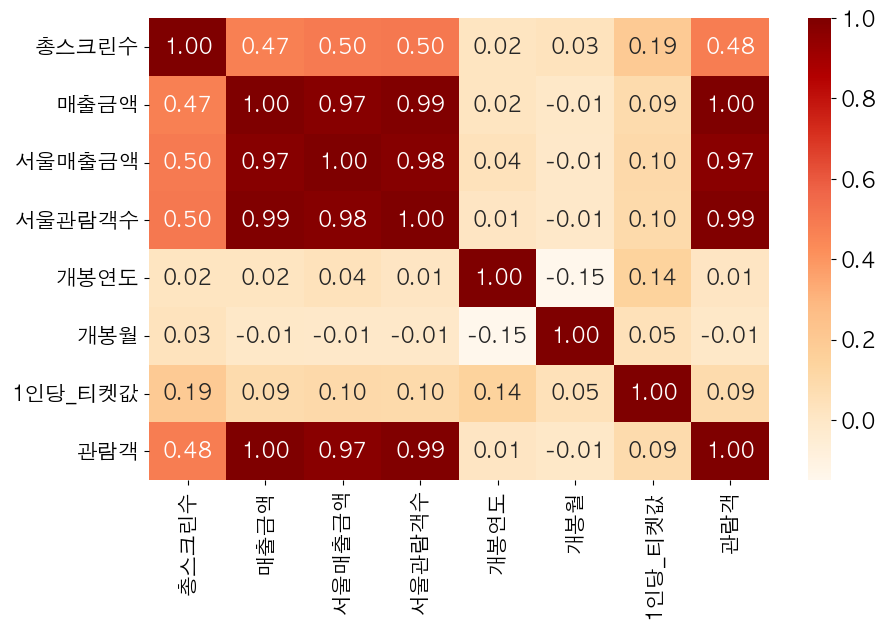

In [18257]:
heatmap()

# feature 삭제

## 영화형태 삭제
- 근거
    - 전체 7064개 데이터중 7045개가 장편, 16개 옴니버스, 2개 단편, 1개 온라인전용으로 데이터가 과하게 불균형배치
    - rf_model, gb_model의 feature_importance확인

In [18258]:
df = df.drop(columns="영화형태")
df.shape

(7064, 17)

In [18259]:
# df = df.drop(columns="감독")
# df.shape

# 파생변수

## 서울매출금액_비율 < cv점수 하락, final 점수 상승
- cv: 13740
- final: 16909

In [18260]:
df["서울매출금액_비율"] = df["서울매출금액"] / df["매출금액"]
df = df.drop(columns="관람객")
df = pd.concat([df, target_], axis=1)
df.shape

(7064, 18)

## 연도별 매출금액
- cv: 13613
- final: 16881

In [18261]:
agg_list = [   
    ("연도별_매출금액_max", "max"),
    ("연도별_매출금액_min", "min"),
]
tmp = df.groupby("개봉연도")["매출금액"].agg(agg_list).reset_index()
df = df.merge(tmp, how="left", on="개봉연도")
df = df.drop(columns="관람객")
df = pd.concat([df, target_],axis=1)
df.shape

(7064, 20)

In [18262]:
del agg_list, tmp
gc.collect();

## 연도별 관람객 < cv점수 상승, final 점수 하락
- 관람객이 타겟값이라 과적합이 일어나는 듯함

In [18263]:
# agg_list = [
#     ("연도별_관람객_mean", "min"),
#     ("연도별_관람객_std", "std"),   
#     ("연도별_관람객_max", "max"),
# ]
# tmp = df.groupby("개봉연도")["관람객"].agg(agg_list).reset_index()
# df = df.merge(tmp, how="left", on="개봉연도")
# df = df.drop(columns="관람객")
# df = pd.concat([df, target_],axis=1)
# df.shape

## 서울관람객_비율

In [18264]:
# df["서울관람객_비율"] = df["서울관람객수"] / df["관람객"]
# df = df.drop(columns="관람객")
# df = pd.concat([df, target_], axis=1)
# df

## 매출금액_quantile
- cv: 11602
- final: 13307

In [18265]:
df["매출금액_quantile"] = pd.cut(df["매출금액"],6 , labels=[1,2,3,4,5,6])
df = df.drop(columns="관람객")
df = pd.concat([df, target_], axis=1)
df.shape

(7064, 21)

## 서울스크린수
- cv: 11215
- final: 13230

In [18266]:
df["서울스크린수"] = df["총스크린수"] * df["서울매출금액_비율"]
df = df.drop(columns="관람객")
df = pd.concat([df, target_], axis=1)
df.shape

(7064, 22)

## 연도별, 장르에 대한 평균 매출금액 < cv점수 상승, final점수 하락

In [18267]:
# tmp = pd.pivot_table(
#     df,
#     index="개봉연도",
#     columns="장르",
#     values="매출금액",
#     aggfunc="mean"
# ).add_prefix("pivot_장르_").add_suffix("별_평균매출금액").reset_index()

# df = df.merge(tmp, how="left", on="개봉연도")
# df = df.drop(columns="관람객")
# df = pd.concat([df, target_], axis=1)
# df.shape

## 서울매출금액_quantile < cv점수 하락, final점수 상승
- cv: 11462
- final: 12594

In [18268]:
df["서울매출금액_quantile"] = pd.cut(df["서울매출금액"], 7, labels=[1,2,3,4,5,6,7])
df = df.drop(columns="관람객")
df = pd.concat([df, target_], axis=1)
df.shape

(7064, 23)

## 서울관람객수_qunatile < cv점수 하락, final점수 상승
- cv: 12412
- final: 6865

In [18269]:
df["서울괌람객수_quantile"] = pd.cut(df["서울관람객수"], 4, labels=[1,2,3,4])
df = df.drop(columns="관람객")
df = pd.concat([df, target_], axis=1)

df.shape

(7064, 24)

## 장르별 매출금액

In [18270]:
# agg_list = [
#     ("장르별_매출금액_mean", "mean"),
#     ("장르별_매출금액_max", "max"),
#     ("장르별_매출금액_min", "min"),
#     ("장르별_매출금액_std", "std"),
#     ("장르별_매출금액_sum", "sum")
# ]
# tmp = df.groupby("장르")["매출금액"].agg(agg_list).reset_index()

# df = df.merge(tmp, how="left", on="장르")
# df = df.drop(columns = "관람객")
# df = pd.concat([df, target_], axis=1)

# df.shape

## 스크린수별 평균 관객 수


In [18271]:
# df["스크린수별_평균관객수"] = df["관람객"] / df["총스크린수"]
# df = df.drop(columns="관람객")
# df = pd.concat([df, target_], axis=1)

# df.shape

## 국적별 매출금액
- cv: 12400
- final: 6844

In [18272]:
agg_list = [ # max, min, std, 6844
    ("국적별_매출금액_max", "max"),
    ("국적별_매출금액_min", "min"),
    # ("국적별_매출금액_mean", "mean"),
    ("국적별_매출금액_std", "std"),
    # ("국적별_매출금액_sum", "sum")
]
tmp = df.groupby("국적")["매출금액"].agg(agg_list).reset_index()
df = df.merge(tmp, how="left", on="국적")
df = df.drop(columns="관람객")
df = pd.concat([df, target_],axis=1)
df.shape

(7064, 27)

## 연도별 각 영화의 장르 수
- cv: 12401
- final: 6837

In [18273]:
tmp = df.groupby(["개봉연도", "장르"])["영화제목"].count().reset_index().rename(columns={"영화제목":"연도별_장르의 수"})
df = df.merge(tmp, how="left", on=["개봉연도", "장르"])
df = df.drop(columns="관람객")
df = pd.concat([df, target_], axis=1)

df.shape

(7064, 28)

# 인코딩


## count_encoding
- "감독, 제작사, 수입사, 유통사, 영화형태, 국적, 장르, 등급, 영화구분" 인코딩 필요
- onehot을 쓰면 피처가 너무 많이 생겨서 나중에 feature_importance 확인 불가
- 데이터타입이 "object"인 피처들을 보면 좋고 나쁜게 따로 없기 때문에 count_encoding채택

In [18274]:
df.select_dtypes("object").columns # 영화제목은 데이터 분할할 때 없앨 예정

Index(['영화제목', '감독', '제작사', '수입사', '유통사', '국적', '장르', '등급', '영화구분'], dtype='object')

### 감독

In [18275]:
cnt_dict = df["감독"].value_counts().to_dict()
df["감독"] = df["감독"].map(cnt_dict)

del cnt_dict
gc.collect();

### 제작사

In [18276]:
cnt_dict = df["제작사"].value_counts().to_dict()
df["제작사"] = df["제작사"].map(cnt_dict)

del cnt_dict
gc.collect();

### 수입사

In [18277]:
cnt_dict = df["수입사"].value_counts().to_dict()
df["수입사"] = df["수입사"].map(cnt_dict)

del cnt_dict
gc.collect();

### 유통사

In [18278]:
cnt_dict = df["유통사"].value_counts().to_dict()
df["유통사"] = df["유통사"].map(cnt_dict)

del cnt_dict
gc.collect();

### 국적

In [18279]:
cnt_dict = df["국적"].value_counts().to_dict()
df["국적"] = df["국적"].map(cnt_dict)

del cnt_dict
gc.collect();

### 장르

In [18280]:
cnt_dict = df["장르"].value_counts().to_dict()
df["장르"] = df["장르"].map(cnt_dict)

del cnt_dict
gc.collect();

### 등급

In [18281]:
cnt_dict = df["등급"].value_counts().to_dict()
df["등급"] = df["등급"].map(cnt_dict)

del cnt_dict
gc.collect();

### 영화구분

In [18282]:
cnt_dict = df["영화구분"].value_counts().to_dict()
df["영화구분"] = df["영화구분"].map(cnt_dict)

del cnt_dict
gc.collect();

In [18283]:
print(df.select_dtypes("object"))

                 영화제목
0                  파묘
1              듄: 파트2
2                댓글부대
3                  웡카
4     고질라 X 콩: 뉴 엠파이어
...               ...
7059           D컵여자친구
7060       F컵 거유의 육덕녀
7061  F컵 거유의 육덕녀 무삭제판
7062  G컵 베이글의 격렬한 플레이
7063  G컵 베이글의 능숙한 몸놀림

[7064 rows x 1 columns]


## 원핫 인코딩

In [18284]:
# cols = train_ft.select_dtypes("object").columns # 피쳐중 데이터 타입이 "object"만 추출
# onehot_enc = OneHotEncoder(handle_unknown="ignore")
# train_encoded = onehot_enc.fit_transform(train_ft[cols]) # 데이터 타입 "object"만 원핫 인코딩
# test_encoded = onehot_enc.transform(test_ft[cols])
# train_ft = train_ft.drop(columns=cols) # train_ft에서 원핫인코딩으로 진행된 피처들 제거
# test_ft = test_ft.drop(columns=cols)

# # train_ft와 train_encoded 결합
# train_sprs = sparse.hstack([sparse.csr_matrix(train_ft),
#                                train_encoded],
#                                format="csr")

# test_sprs = sparse.hstack([sparse.csr_matrix(test_ft),
#                                test_encoded],
#                                format="csr")

In [18285]:
# sparse.hstack([sparse.csr_matrix(train_ft),
#                train_encoded],
#               format="csr")

In [18286]:
# train_sprs.shape, test_sprs.shape

# 스케일링

## MinMax
- cv: 11259
- final: 5324

In [18287]:
idx_ = df.loc[df["개봉연도"]==2017].index # 데이터 갯수가 1개라 train test split 적용불가
df = df.drop(idx_)

df_ft = df.drop(columns="관람객")
df_ft = df_ft.iloc[:,1:] # 영화제목 제외하고 모델학습

target = df["관람객"]
df_ft.shape, df.shape, target.shape

((7063, 26), (7063, 28), (7063,))

In [18288]:
minmax_scale = MinMaxScaler()
df_ft[df_ft.columns] = minmax_scale.fit_transform(df_ft)

# 데이터 분할
- 개봉연도별로 편차가 많으므로 stratify를 개봉연도로 한다

In [18289]:
train_ft, test_ft, train_target, test_target= train_test_split(df_ft, target, test_size=0.2, shuffle=True, random_state=42, stratify=df_ft["개봉연도"])
train_ft.shape, test_ft.shape, train_target.shape, test_target.shape

((5650, 26), (1413, 26), (5650,), (1413,))

In [18290]:
test_ft["개봉연도"].value_counts(normalize=True) # 개봉연도 균등하게 분포

개봉연도
0.2    0.268224
0.4    0.262562
0.6    0.250531
0.8    0.186837
1.0    0.019816
0.0    0.012031
Name: proportion, dtype: float64

# 모델링 & 스코어

## 모델 설정

In [18291]:
# feature_importance를 확인하기 위해 트리기반 모델 테스트
rf_model = RandomForestRegressor(random_state=42)
lgbm_model = LGBMRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
hgb_model = HistGradientBoostingRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)
cat_model = CatBoostRegressor(random_state=42)
lr_model = LinearRegression()
lasso_model = Lasso(random_state=42)
ridge_model = Ridge(random_state=42)
tree_model = DecisionTreeRegressor(random_state=42)

## 모델별 cross_val_score 점수 확인

### rf_model

In [18292]:
# scores = cross_val_score(rf_model, train_ft, train_target, scoring="neg_root_mean_squared_error", cv=KFold(n_splits=5, shuffle=True, random_state=42))
# -scores.mean()

###  xgb_model

In [18293]:
# scores = cross_val_score(xgb_model, train_ft, train_target, scoring="neg_root_mean_squared_error", cv=KFold(n_splits=5, shuffle=True, random_state=42))
# -scores.mean()

### cat_model

In [18294]:
# scores = cross_val_score(cat_model, train_ft, train_target, scoring="neg_root_mean_squared_error", cv=KFold(n_splits=5, shuffle=True, random_state=42))
# -scores.mean()

### lr_model

In [18295]:
scores = cross_val_score(lr_model, train_ft, train_target, scoring="neg_root_mean_squared_error", cv=KFold(n_splits=5, shuffle=True, random_state=42))
-scores.mean()

12532.889193859908

### lasso_model

In [18296]:
scores = cross_val_score(lasso_model, train_ft, train_target, scoring="neg_root_mean_squared_error", cv=KFold(n_splits=5, shuffle=True, random_state=42))
-scores.mean()

11259.29207456961

### ridge_model

In [18297]:
# ridge_model_cross_val_score 점수 확인
scores = cross_val_score(ridge_model, train_ft, train_target, scoring="neg_root_mean_squared_error", cv=KFold(n_splits=5, shuffle=True, random_state=42))
-scores.mean()

51916.74852989209

### lgbm_model

In [18298]:
# # lgbm_model_cross_val_score 점수 확인
# scores = cross_val_score(lgbm_model, train_ft, train_target, scoring="neg_root_mean_squared_error", cv=KFold(n_splits=5, shuffle=True, random_state=42))
# -scores.mean()

### gb_model

In [18299]:
# scores = cross_val_score(gb_model, train_ft, train_target, scoring="neg_root_mean_squared_error", cv=KFold(n_splits=5, shuffle=True, random_state=42))
# -scores.mean()

### hgb_model

In [18300]:
# scores = cross_val_score(hgb_model, train_ft, train_target, scoring="neg_root_mean_squared_error", cv=KFold(n_splits=5, shuffle=True, random_state=42))
# -scores.mean()

### tree_model

In [18301]:
# scores = cross_val_score(tree_model, train_ft, train_target, scoring="neg_root_mean_squared_error", cv=KFold(n_splits=5, shuffle=True, random_state=42))
# -scores.mean()

## Feature 축소


### SelectFromModel

In [18302]:
# models = lr_model, lasso_model, ridge_model
# score = []
# for idx, model in enumerate(models):
#     select_from_model = SelectFromModel(model)
#     train_selected = select_from_model.fit_transform(train_ft, train_target)
#     print(train_selected.shape)
#     scores = cross_val_score(model, train_ft, train_target, scoring="neg_root_mean_squared_error", cv=KFold(n_splits=5, shuffle=True, random_state=42))
#     score.append(-scores.mean())
#     print(f"{score[idx]}")

### SelectPercentile

In [18303]:
# best_score = 0
# perfect_percent = 0
# models = [lr_model, lasso_model, ridge_model]
# for model in models:
#     for best_percent in range(1,101):
#         select_percentile = SelectPercentile(percentile = best_percent)
#         train_selected = select_percentile.fit_transform(train_ft, train_target)
#         scores = cross_val_score(model, train_ft, train_target, scoring="neg_root_mean_squared_error", cv=KFold(n_splits=5, shuffle=True, random_state=42))
#         score = -scores.mean()
        
#         if score > best_score:
#             best_score = score
#             perfect_percent = best_percent
            
#     print(f"{model}_best_score: {best_score}")
#     print(f"{model}_best_percent: {perfect_percent}")
        

### PCA

In [18306]:
# models = [lr_model, lasso_model, ridge_model]
# for model in models:
#     for num in range(1,27):
#         pca = PCA(random_state=42, n_components=num)
#         tmp = pd.DataFrame(pca.fit_transform(train_ft))
#         scores = cross_val_score(model, train_ft, train_target, scoring="neg_root_mean_squared_error", cv=KFold(n_splits=5, shuffle=True, random_state=42))
#         score = -scores.mean()

#         if score > 0:
#             best_score = score
#             best_num = num
    
#     print(f"{model}_best_score: {best_score}")
#     print(f"best_components: {best_num}")

LinearRegression()_best_score: 12532.889193859908
best_components: 26
Lasso(random_state=42)_best_score: 11259.29207456961
best_components: 26
Ridge(random_state=42)_best_score: 51916.74852989209
best_components: 26


## GridSearchCv

### 하이퍼파라미터 범위 지정

In [18320]:
lr_param_grid = {
    'fit_intercept': [True, False], 
}

lasso_param_grid = {
    'alpha': [0.1, 0.5, 1.0, 5.0, 10.0],  
    'max_iter': [1000, 5000, 10000],    
    'tol': [0.0001, 0.001, 0.01]  
}

ridge_param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0, 1000.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg'],
    'tol': [0.0001, 0.001, 0.01]  
}

### RMSE 함수 생성

In [18309]:
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

rmse_scorer = make_scorer(rmse, greater_is_better=False)

### LinearRegressor, Lasso, Ridge < GridSearchCV 학습

In [18324]:
models = [lr_model, lasso_model, ridge_model]
best_score = []
best_params = []

hyper_params = [lr_param_grid, lasso_param_grid, ridge_param_grid]
for idx, model in enumerate(models):
    grid_search = GridSearchCV(
        model,
        hyper_params[idx],
        scoring=rmse_scorer,
        cv=KFold(n_splits=5, shuffle=True, random_state=42)
    )
    grid_search.fit(train_ft, train_target)
    best_score.append(grid_search.best_score_)
    best_params.append(grid_search.best_params_)
    print(f"{model}best_score: {best_score[idx]}")

LinearRegression()best_score: -12516.77298259427
Lasso(random_state=42)best_score: -10915.110238977093
Ridge(random_state=42)best_score: -23857.38929076962


- Lasso 점수가 제일 높음

In [18326]:
best_params[1] # Lasso_best_params

{'alpha': 1.0, 'max_iter': 1000, 'tol': 0.001}

### Lasso 하이퍼파라미터 모델 학습

In [18328]:
lasso_grid_model = Lasso(random_state=42, **best_params[1]).fit(train_ft, train_target)

In [18334]:
pred = lasso_grid_model.predict(test_ft)
score = root_mean_squared_error(test_target, pred)
print(f"Project_final_model: Lasso \nfinal_score: {score}")

Project_final_model: Lasso 
final_score: 5219.466471954935


## 최종 점수

### rf_model score

In [17829]:
# rf_model.fit(train_ft, train_target)
# pred = rf_model.predict(test_ft)
# root_mean_squared_error(test_target, pred)

### lgbm_model score

In [17830]:
# lgbm_model.fit(train_ft, train_target)
# pred = lgbm_model.predict(test_ft)
# root_mean_squared_error(test_target, pred)

### gb_model score

In [17831]:
# gb_model.fit(train_ft, train_target)
# pred = gb_model.predict(test_ft)
# root_mean_squared_error(test_target, pred)

### hgb_model score

In [17832]:
# hgb_model.fit(train_ft, train_target)
# pred = hgb_model.predict(test_ft)
# root_mean_squared_error(test_target, pred)

### xgb_model score

In [17833]:
# xgb_model.fit(train_ft, train_target)
# pred = xgb_model.predict(test_ft)
# root_mean_squared_error(test_target, pred)

### cat_model score

In [17834]:
# cat_model.fit(train_ft, train_target)
# pred = cat_model.predict(test_ft)
# root_mean_squared_error(test_target, pred)

### lr_model score

In [17835]:
lr_model.fit(train_ft, train_target)
pred = lr_model.predict(test_ft)
root_mean_squared_error(test_target, pred)

7433.320999718224

### lasso_model score

In [18036]:
lasso_model.fit(train_ft, train_target)
pred = lasso_model.predict(test_ft)
root_mean_squared_error(test_target, pred)

5324.985301398075

### ridge_model score

In [17837]:
ridge_model.fit(train_ft, train_target)
pred = ridge_model.predict(test_ft)
root_mean_squared_error(test_target, pred)

52906.90790803522

### tree_model score

In [17838]:
# tree_model.fit(train_ft, train_target)
# pred = tree_model.predict(test_ft)
# root_mean_squared_error(test_target, pred)

# feature importance

In [17839]:
# rf_model.fit(train_ft, train_target)
# arg_idx = np.argsort(rf_model.feature_importances_)[::-1]

# plt.figure(figsize=(10,7))
# sns.barplot(y = train_ft.columns[arg_idx], x=rf_model.feature_importances_[arg_idx])

In [17840]:
# gb_model.fit(train_ft, train_target)
# arg_idx = np.argsort(gb_model.feature_importances_)[::-1]

# plt.figure(figsize=(10,7))
# sns.barplot(y = train_ft.columns[arg_idx], x=gb_model.feature_importances_[arg_idx])

# 정리하기
- ridge, lasso, linearRegressor
    - cv: 12323
    - final: 16979
- rf_model
    - cv: 63279
    - final: 162505
- cat_model
    - cv: 70824
    - final: 247618
- lgbm_model
    - cv: 119125
    - final: 270712
- gb_model
    - cv: 77215
    - final: 91463
- hgb_model
    - cv: 137525
    - final: 272360
- tree_model
    - cv: 93476
    - final: 228121

- obervation
    - 간편한모델이 점수가 높다.(ridge, lasso, linearRegressor)
    - 앙상블 모델은 대체로 다 안 좋으며 그나마 gb_model이 높다.